
--- ESTADÍSTICAS ---
Media:
 CPU (%)        60.456410
RAM (%)        86.776923
Disco (%)      37.200000
Subida KB/s     6.458205
Bajada KB/s    56.124872
dtype: float64

Mediana:
 CPU (%)        37.00
RAM (%)        87.50
Disco (%)      37.20
Subida KB/s     4.22
Bajada KB/s    20.66
dtype: float64

Moda:
 CPU (%)        100.00
RAM (%)         87.20
Disco (%)       37.20
Subida KB/s      0.11
Bajada KB/s     11.92
Name: 0, dtype: float64

Desviación estándar:
 CPU (%)        3.549268e+01
RAM (%)        2.551105e+00
Disco (%)      2.879325e-14
Subida KB/s    7.596859e+00
Bajada KB/s    9.556124e+01
dtype: float64


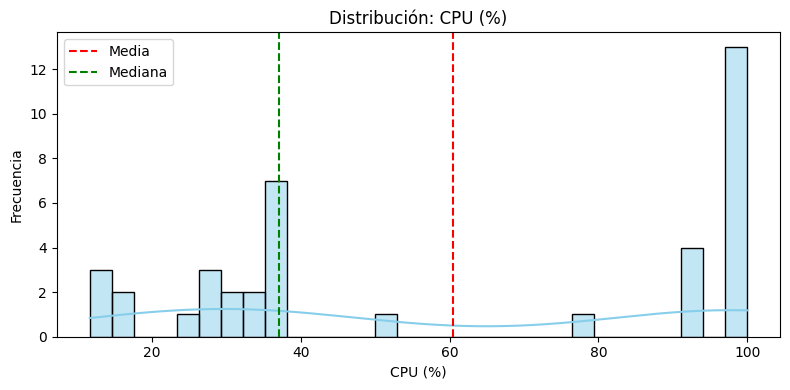

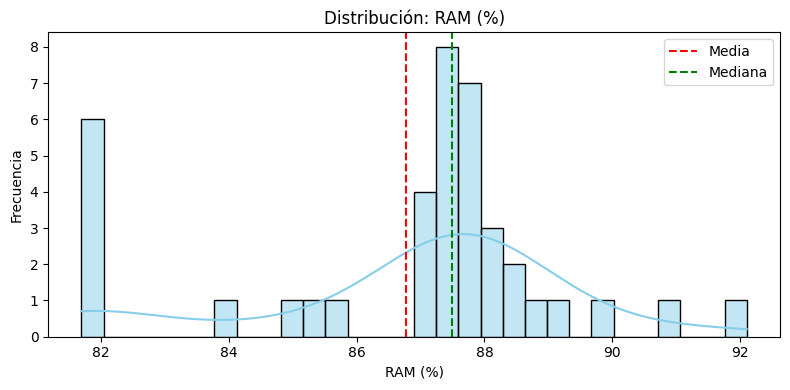

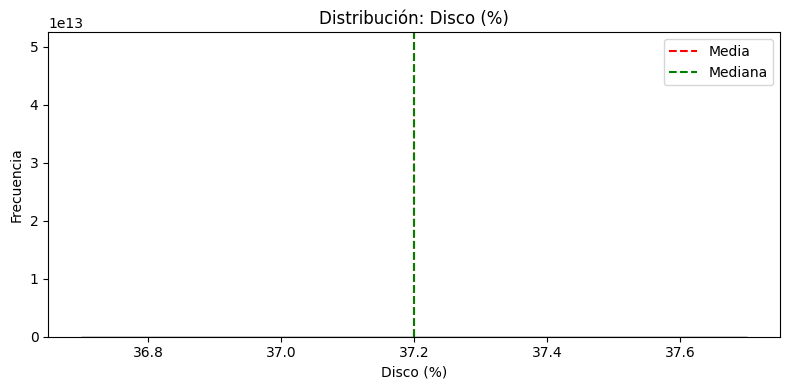

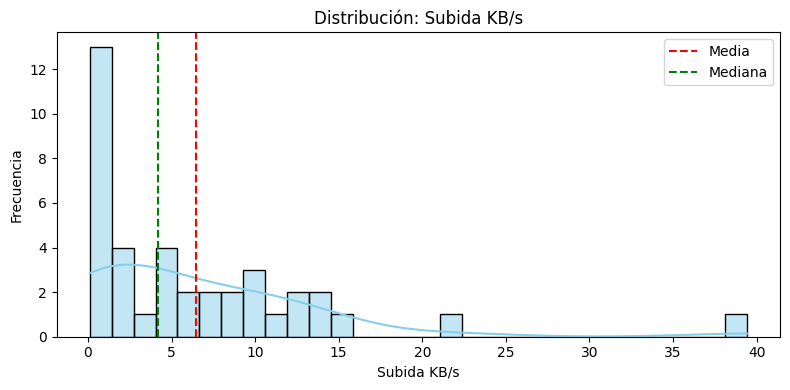

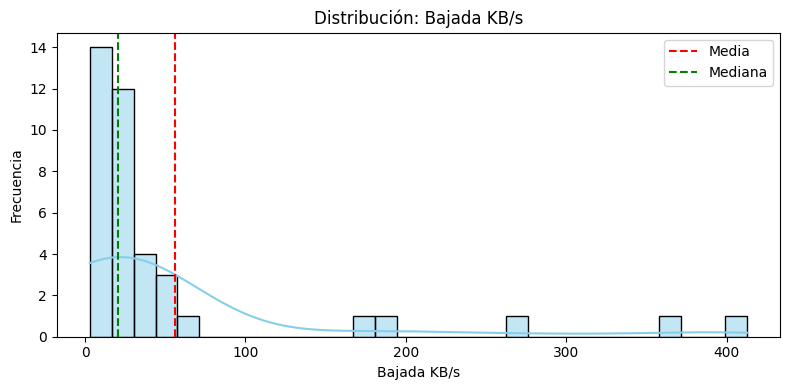

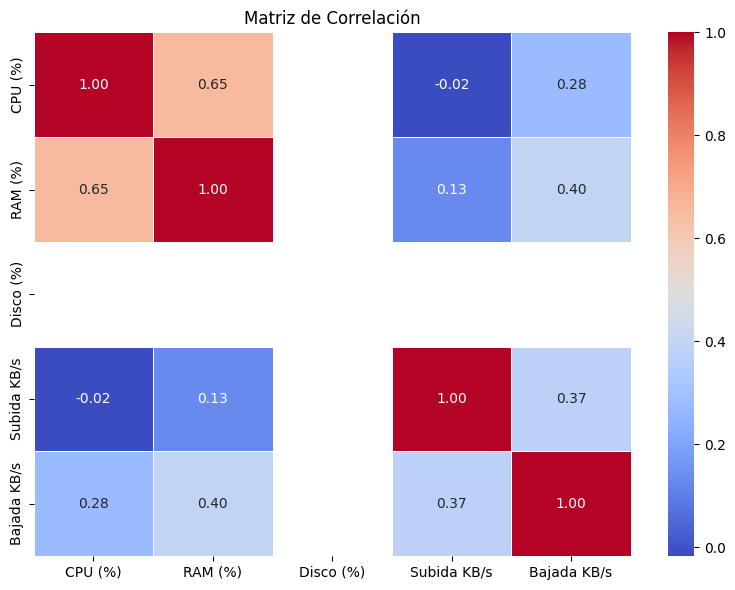

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- URL del CSV en GitHub (RAW) ---
url = "https://raw.githubusercontent.com/aII4n/RendimentoPC-Parcial-/refs/heads/main/rendimiento_pc.csv"

# --- Leer CSV remoto ---
df = pd.read_csv(url)

# --- Convertir fecha si existe ---
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'])

# --- Variables numéricas ---
numericas = df.select_dtypes(include='number')

# --- Estadísticas ---
media = numericas.mean()
mediana = numericas.median()
moda = numericas.mode().iloc[0]
desviacion = numericas.std()

print("\n--- ESTADÍSTICAS ---")
print("Media:\n", media)
print("\nMediana:\n", mediana)
print("\nModa:\n", moda)
print("\nDesviación estándar:\n", desviacion)

# --- GRÁFICOS DE DISTRIBUCIÓN ---
for columna in numericas.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numericas[columna], kde=True, color='skyblue', bins=30)
    plt.axvline(media[columna], color='red', linestyle='--', label='Media')
    plt.axvline(mediana[columna], color='green', linestyle='--', label='Mediana')
    plt.title(f'Distribución: {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- MATRIZ DE CORRELACIÓN ---
correlacion = numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()
